In [1]:
import pandas as pd
import requests
from conda_forge_tick.utils import loads
from collections import Counter
import matplotlib.pyplot as plt

/home/christopher/mc/lib/python3.7/site-packages/github3/session.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Callable
/home/christopher/mc/lib/python3.7/site-packages/github3/structs.py:11: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  class GitHubIterator(models.GitHubCore, collections.Iterator):


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/regro/cf-graph-countyfair/master/audits/depfinder_accuracy.csv')

/home/christopher/mc/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
df['time'] = pd.to_datetime(df['time'].values, unit='s')

In [4]:
df = df.set_index('time').drop(columns=['audit_creation_version', 'definder_version'])

In [5]:
df2 = df.copy().div(df.sum(axis=1), axis=0) * 100

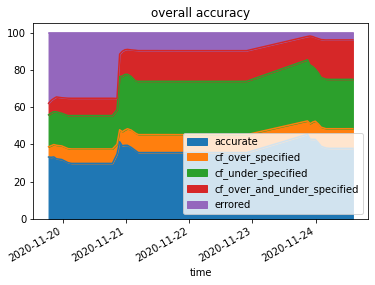

In [6]:
ax = df2.plot.area(title='overall accuracy')

In [7]:
df2.tail()

/home/christopher/mc/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,accurate,cf_over_specified,cf_under_specified,cf_over_and_under_specified,errored
time,,,,,
2020-11-24 10:09:12.298892498,37.880795,10.537160,26.460633,21.162620,3.958793
2020-11-24 11:07:33.981993437,37.880795,10.537160,26.460633,21.162620,3.958793
2020-11-24 12:09:26.554469824,37.880795,10.551876,26.460633,21.147903,3.958793
2020-11-24 13:08:07.145534515,37.880795,10.551876,26.460633,21.147903,3.958793
2020-11-24 14:08:41.909677267,37.880795,10.551876,26.460633,21.147903,3.958793


In [8]:
audit = loads(requests.get('https://raw.githubusercontent.com/regro/cf-graph-countyfair/master/audits/depfinder/_net_audit.json').text)

/home/christopher/mc/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
df_minus_cf = {k: v['df_minus_cf'] for k, v in audit.items() if v and 'df_minus_cf' in v}

In [10]:
df_minus_cf_counts = [len(v) for v in df_minus_cf.values()]

Text(0.5, 1.0, 'Number of feedstock missing N pkgs')

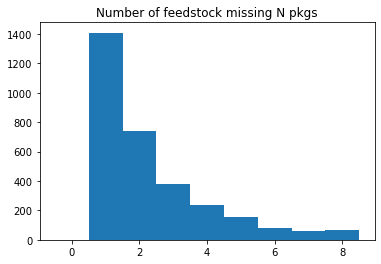

In [11]:
plt.hist(df_minus_cf_counts, bins=range(10), align='left')
plt.title('Number of feedstock missing N pkgs')

In [12]:
df_minus_cf_pkgs = [vv for v in df_minus_cf.values() for vv in v]

In [13]:
# the most common pkgs that are missing

In [14]:
Counter(df_minus_cf_pkgs).most_common(10)

[('matplotlib', 767),
 ('numpy', 459),
 ('pytest', 388),
 ('six', 240),
 ('pandas', 197),
 ('scipy', 179),
 ('requests', 172),
 ('pyyaml', 131),
 ('ipython', 120),
 ('docutils', 118)]

In [15]:
cf_minus_df = {k: v['cf_minus_df'] for k, v in audit.items() if v and 'cf_minus_df' in v}

In [16]:
cf_minus_df_counts = [len(v) for v in cf_minus_df.values()]

Text(0.5, 1.0, 'Number of feedstock with too many N pkgs')

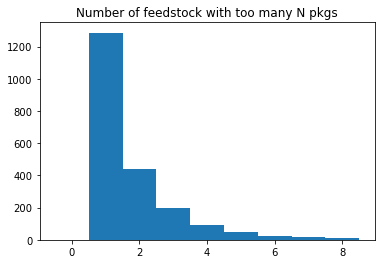

In [17]:
plt.hist(cf_minus_df_counts, bins=range(10), align='left')
plt.title('Number of feedstock with too many N pkgs')

In [18]:
cf_minus_df_pkgs = [vv for v in cf_minus_df.values() for vv in v]

In [19]:
# the most common pkgs too many

In [20]:
Counter(cf_minus_df_pkgs).most_common(10)

[('matplotlib-base', 592),
 ('six', 112),
 ('future', 80),
 ('numpy', 76),
 ('scipy', 74),
 ('pytest', 56),
 ('requests', 45),
 ('pillow', 37),
 ('jupyter', 36),
 ('boost', 36)]

In [21]:
single_df_minus_cf = {k: next(iter(v)) for k, v in df_minus_cf.items() if len(v) == 1}

In [22]:
# the most common pkgs that are the only pkg too few

In [23]:
Counter(single_df_minus_cf.values()).most_common(10)

[('matplotlib', 228),
 ('pytest', 143),
 ('numpy', 84),
 ('six', 42),
 ('cython', 33),
 ('traitlets', 29),
 ('django', 23),
 ('docutils', 23),
 ('werkzeug', 23),
 ('py', 22)]

In [24]:
single_cf_minus_df = {k: next(iter(v)) for k, v in cf_minus_df.items() if len(v) == 1}

In [25]:
# the most common pkgs that are the only pkg too many

In [26]:
Counter(single_cf_minus_df.values()).most_common(10)

[('matplotlib-base', 324),
 ('six', 64),
 ('future', 38),
 ('numpy', 28),
 ('scipy', 22),
 ('boost', 15),
 ('requests', 14),
 ('pytest', 13),
 ('pyqt', 12),
 ('flake8', 12)]

In [27]:
# the most common pkgs that are the only 2 pkgs too many

In [28]:
double_df_minus_cf = [vv for k, v in df_minus_cf.items() if len(v) == 2 for vv in v]

In [29]:
Counter(double_df_minus_cf).most_common(10)

[('matplotlib', 173),
 ('numpy', 112),
 ('pytest', 83),
 ('six', 52),
 ('pyyaml', 35),
 ('scipy', 31),
 ('ipython', 31),
 ('requests', 28),
 ('traitlets', 28),
 ('pandas', 28)]